In [56]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


In [57]:
fashion_mnist = keras.datasets.fashion_mnist

In [58]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [59]:
X_train_full.shape

(60000, 28, 28)

In [60]:
X_train_full.dtype

dtype('uint8')

## pre-processing

In [61]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000]/255.0, y_train_full[5000:]
X_test = X_test/255.0

In [62]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag",
              "Ankle Boot"]

In [63]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(500, activation = 'relu'))

model.add(keras.layers.Dense(500, activation = 'sigmoid'))

model.add(keras.layers.Dense(10, activation = 'softmax'))

In [64]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 500)               392500    
                                                                 
 dense_13 (Dense)            (None, 500)               250500    
                                                                 
 dense_14 (Dense)            (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.layers

In [66]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "nadam", metrics = ["accuracy"])

In [67]:
history = model.fit(X_train, y_train, epochs=50, validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.4635 - accuracy: 0.8299 - val_loss: 7.2338 - val_accuracy: 0.0804
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3422 - accuracy: 0.8729 - val_loss: 7.1423 - val_accuracy: 0.0836
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3044 - accuracy: 0.8851 - val_loss: 7.9757 - val_accuracy: 0.0748
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2800 - accuracy: 0.8949 - val_loss: 8.5045 - val_accuracy: 0.0784
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2612 - accuracy: 0.9020 - val_loss: 9.5327 - val_accuracy: 0.0716
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2457 - accuracy: 0.9071 - val_loss: 9.0850 - val_accuracy: 0.0842
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2304 - accuracy: 0.9121 - val_loss: 10.2765 - val_a

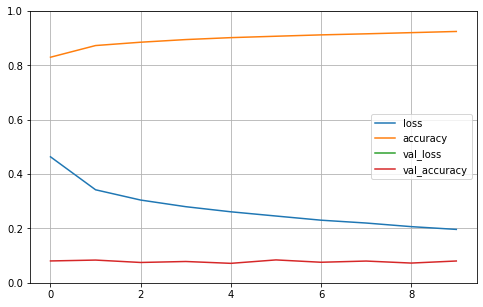

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize =(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [69]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3254 - accuracy: 0.8888


[0.32536646723747253, 0.8888000249862671]

In [70]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(3)

1/1 [==============================] - 0s 40ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.003, 0.   ,
        0.996],
       [0.002, 0.   , 0.989, 0.   , 0.005, 0.   , 0.004, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)